### Prediction And Forecasting Using Stacked LSTM

In [1]:
# https://github.com/krishnaik06/Stock-MArket-Forecasting
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [2]:
### Data Collection
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
#tf.__version__
from keras.layers import Bidirectional
#epoch
epc=20

In [3]:
### Data Collection
import pandas_datareader as pdr
key="9355310af715193b76c66915fa0ccb04f234ed56"

import pandas as pd
import matplotlib.pyplot as plt
from numpy import array

In [4]:
#df = pdr.get_data_tiingo('btcusd', start='2016-01-30', end='2020-12-17', api_key=key)
#df.to_csv('BTCpre.csv')

In [5]:
df=pd.read_csv('Binance_BTCUSDT_1h.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.610928e+12,2021-01-18 00:00:00,BTC/USDT,35824.99,35982.92,35551.81,35728.50,1230.368943,4.405188e+07,17285.0
1,1.610924e+12,2021-01-17 23:00:00,BTC/USDT,36181.16,36417.51,35506.00,35828.61,3344.525693,1.206855e+08,67137.0
2,1.610921e+12,2021-01-17 22:00:00,BTC/USDT,36542.97,36700.00,36000.39,36181.16,2247.453044,8.193199e+07,68903.0
3,1.610917e+12,2021-01-17 21:00:00,BTC/USDT,36073.88,36852.50,36073.87,36542.96,3878.402824,1.416479e+08,90548.0
4,1.610914e+12,2021-01-17 20:00:00,BTC/USDT,35633.90,36099.00,35559.84,36072.99,1917.722247,6.871861e+07,54608.0


In [6]:
df.sort_values(by=['date'], inplace=True, ascending=True)
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
32627,1.502975e+09,2017-08-17 01-PM,BTC/USDT,4411.00,4459.00,4411.00,4459.00,30.76,136515.55,NaN
32626,1.502978e+09,2017-08-17 02-PM,BTC/USDT,4459.00,4485.39,4435.93,4470.82,51.74,230871.45,NaN
32625,1.502982e+09,2017-08-17 03-PM,BTC/USDT,4470.82,4470.82,4333.42,4352.34,67.79,299224.79,NaN
32636,1.502942e+09,2017-08-17 04-AM,BTC/USDT,16199.91,16199.91,4261.32,4308.83,44.51,190952.85,NaN
32624,1.502986e+09,2017-08-17 04-PM,BTC/USDT,4352.34,4354.35,4255.30,4354.18,67.17,289379.63,NaN


In [7]:
df1=df.reset_index()['close']

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

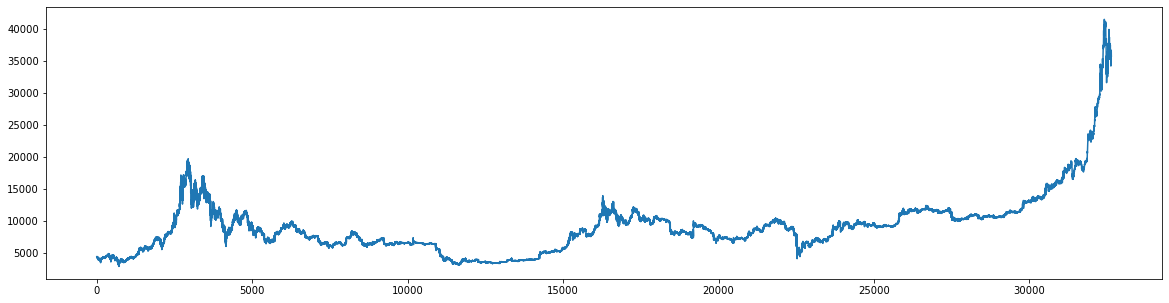

In [8]:
#plot imported and reseted  data
plt.figure(figsize=(20, 5))
plt.plot(df1)
plt.plot

### Part 1 - simple neural network

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
df1

0         4459.00
1         4470.82
2         4352.34
3         4308.83
4         4354.18
           ...   
32632    36072.99
32633    36542.96
32634    36181.16
32635    35828.61
32636    35728.50
Name: close, Length: 32637, dtype: float64

In [11]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.03996353]
 [0.04027027]
 [0.03719567]
 ...
 [0.8631646 ]
 [0.8540158 ]
 [0.85141791]]


In [13]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(26109, 6528)

In [15]:
#train_data

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(26008, 100)
(26008,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(6427, 100)
(6427,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
#creating LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/20
407/407 [==============================] - 58s 129ms/step - loss: 8.7844e-04 - val_loss: 8.8769e-04
Epoch 2/20
407/407 [==============================] - 49s 120ms/step - loss: 4.5960e-05 - val_loss: 3.7514e-04
Epoch 3/20
407/407 [==============================] - 50s 122ms/step - loss: 3.8243e-05 - val_loss: 1.4427e-04
Epoch 4/20
407/407 [==============================] - 49s 120ms/step - loss: 3.6865e-05 - val_loss: 3.4923e-04
Epoch 5/20
407/407 [==============================] - 48s 118ms/step - loss: 3.3627e-05 - val_loss: 6.0215e-04
Epoch 6/20
407/407 [==============================] - 49s 120ms/step - loss: 3.6917e-05 - val_loss: 2.1613e-04
Epoch 7/20
407/407 [==============================] - 50s 124ms/step - loss: 3.8070e-05 - val_loss: 1.7439e-04
Epoch 8/20
407/407 [==============================] - 50s 122ms/step - loss: 3.6081e-05 - val_loss: 2.5754e-04
Epoch 9/20
407/407 [==============================] - 51s 125ms/step - loss: 3.4038e-05 - val_loss: 1.2735e-04
E

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

7986.254241076321

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15751.486660002336

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

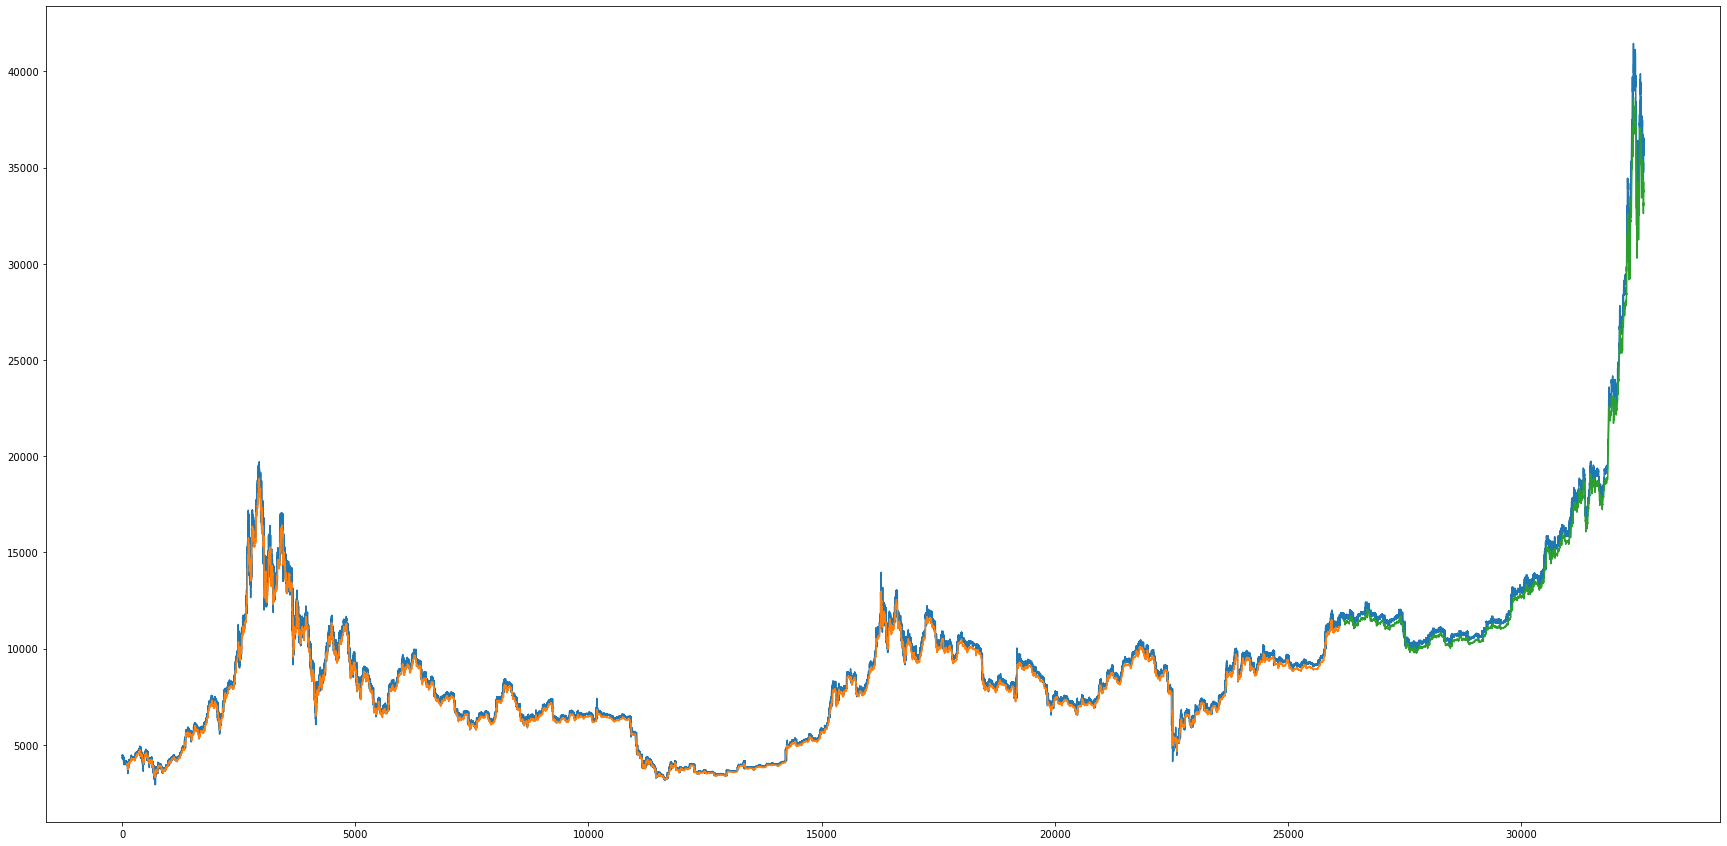

In [31]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

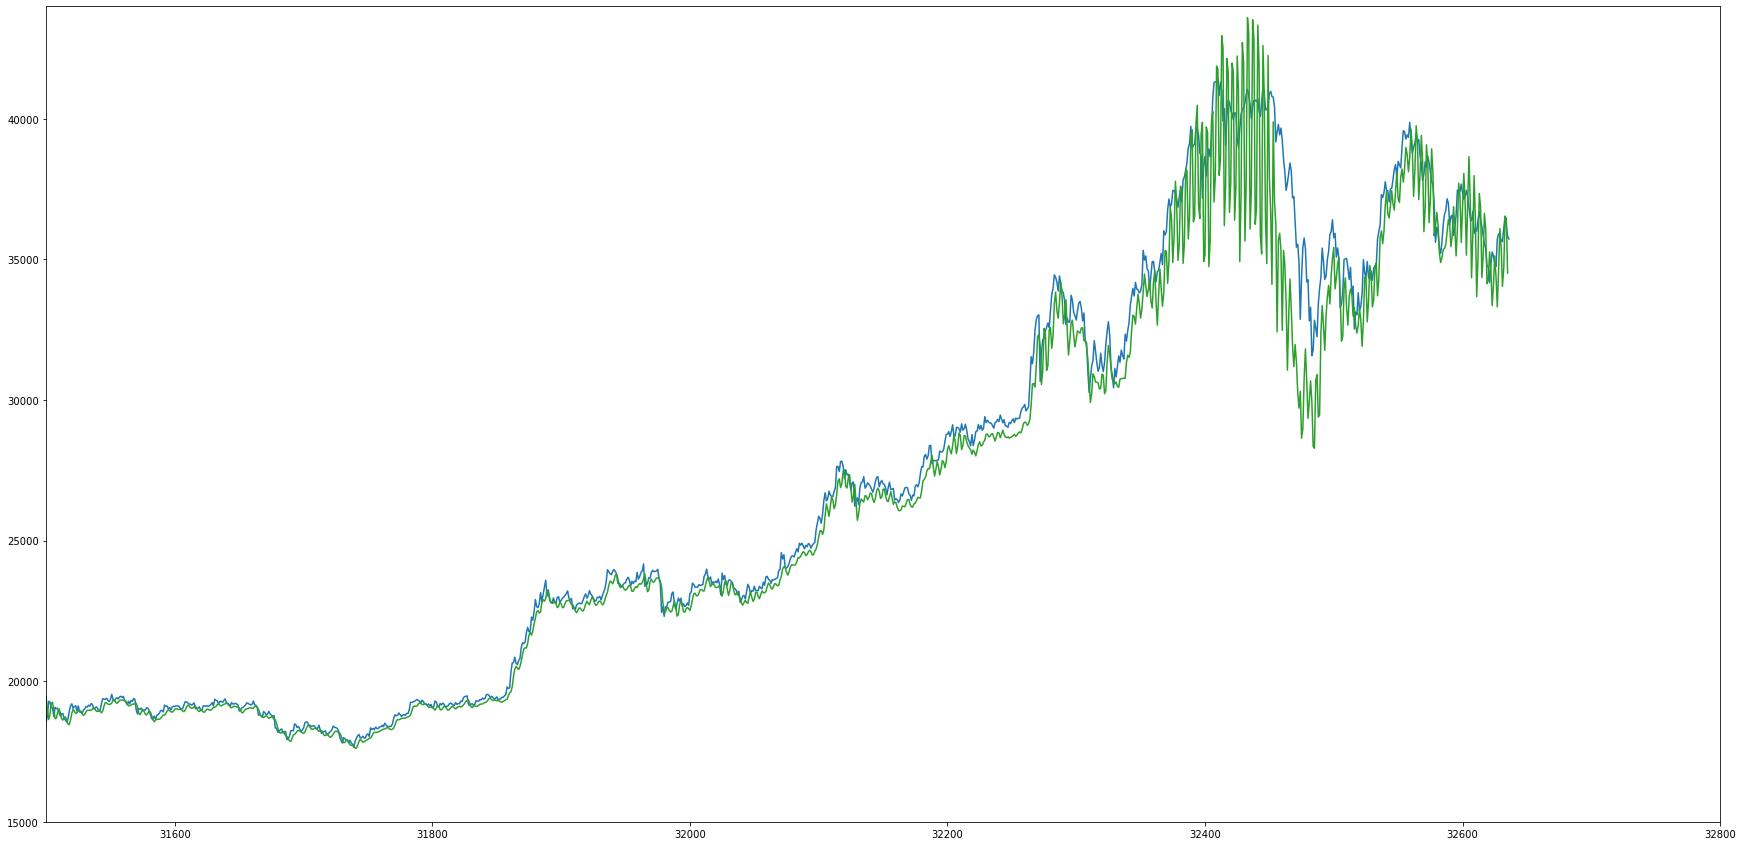

In [143]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

6528

In [34]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [35]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8051486611366272], [0.786950409412384], [0.7622922658920288], [0.7375943660736084], [0.7153759598731995], [0.6955457329750061], [0.6772480010986328], [0.6597625017166138], [0.642675518989563], [0.625800371170044], [0.6090863347053528], [0.5925625562667847], [0.5763009786605835], [0.5603888630867004], [0.5449079871177673], [0.5299209952354431], [0.5154672265052795], [0.5015636086463928], [0.48820960521698], [0.4753926992416382], [0.4630940556526184], [0.4512918293476105], [0.43996402621269226], [0.4290897250175476], [0.4186493158340454], [0.40862417221069336], [0.39899682998657227], [0.3897504210472107], [0.3808678686618805], [0.37233275175094604]]


In [37]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [38]:
len(df1)

32637

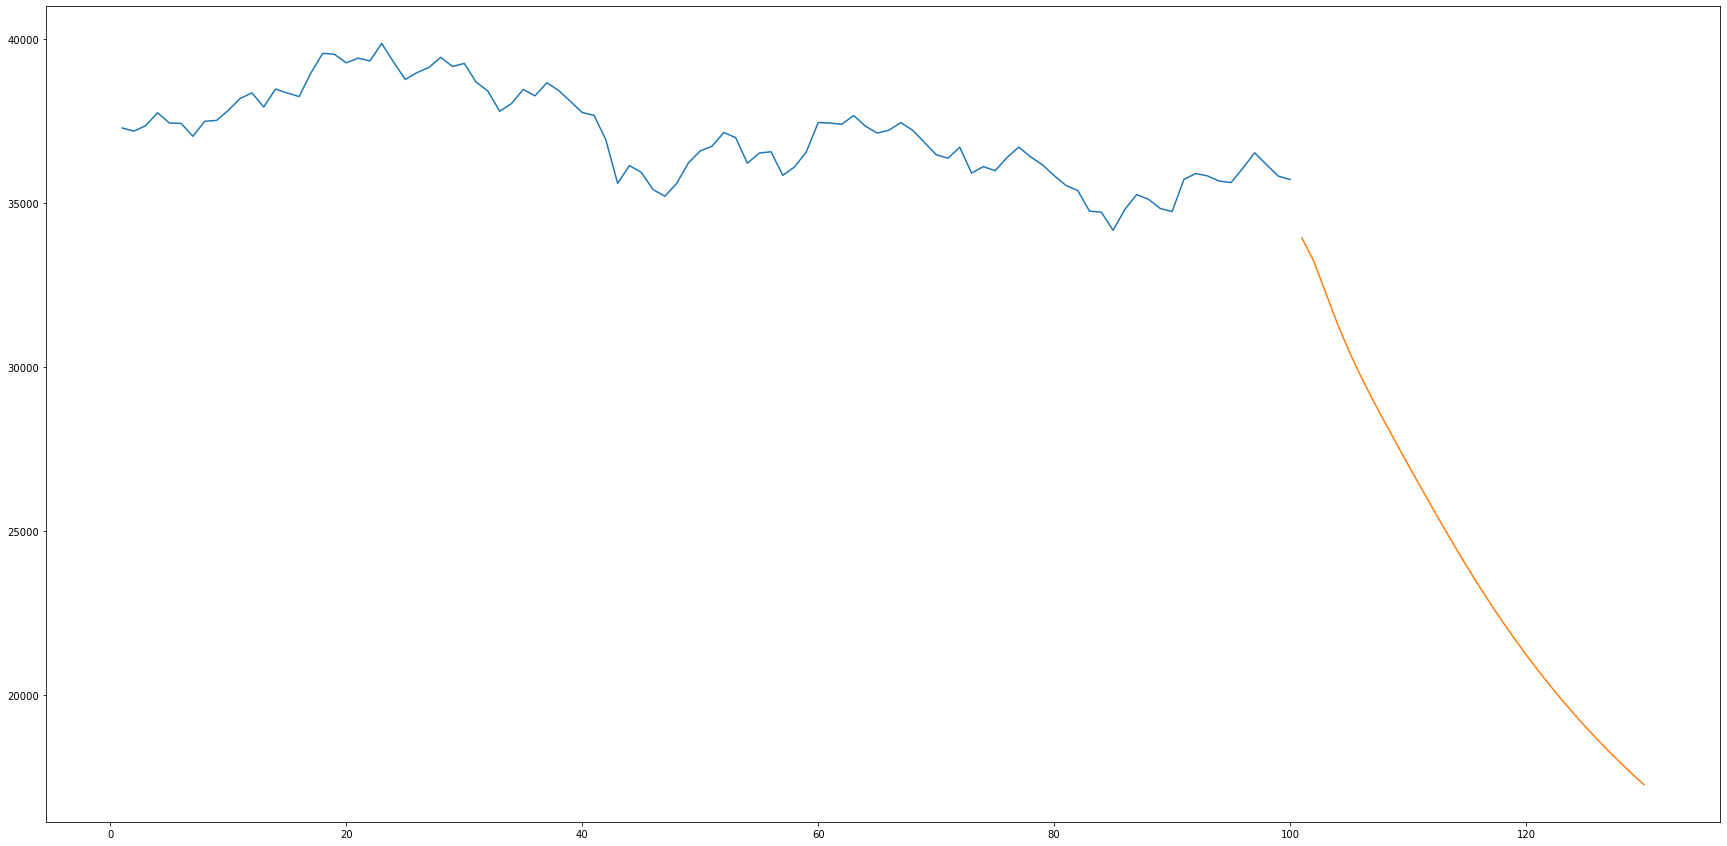

In [39]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

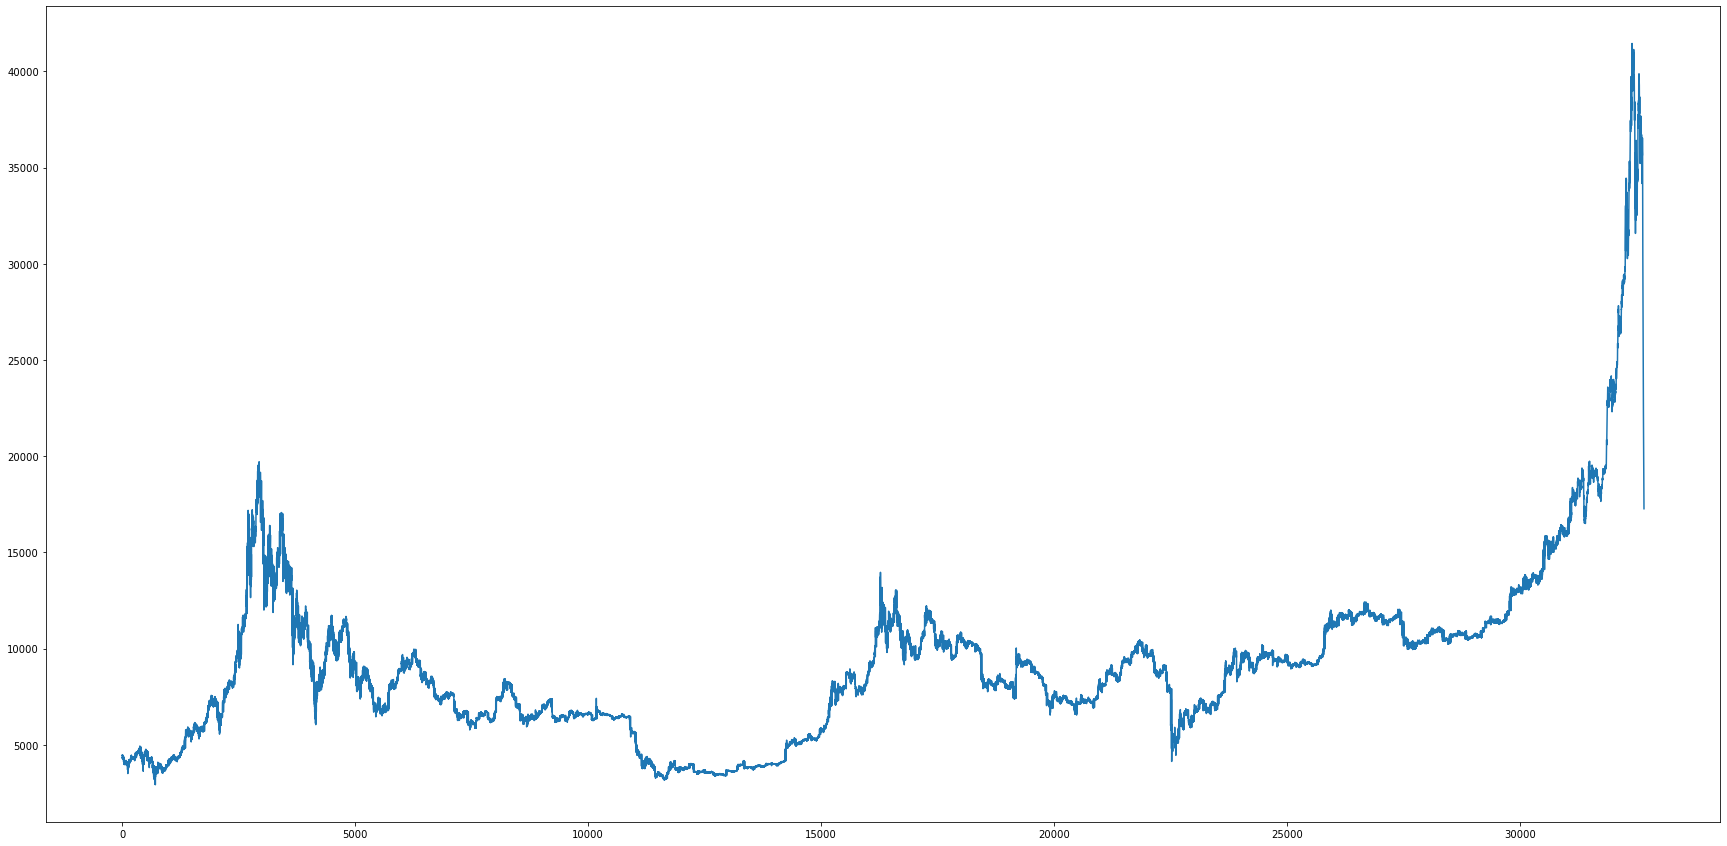

In [40]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

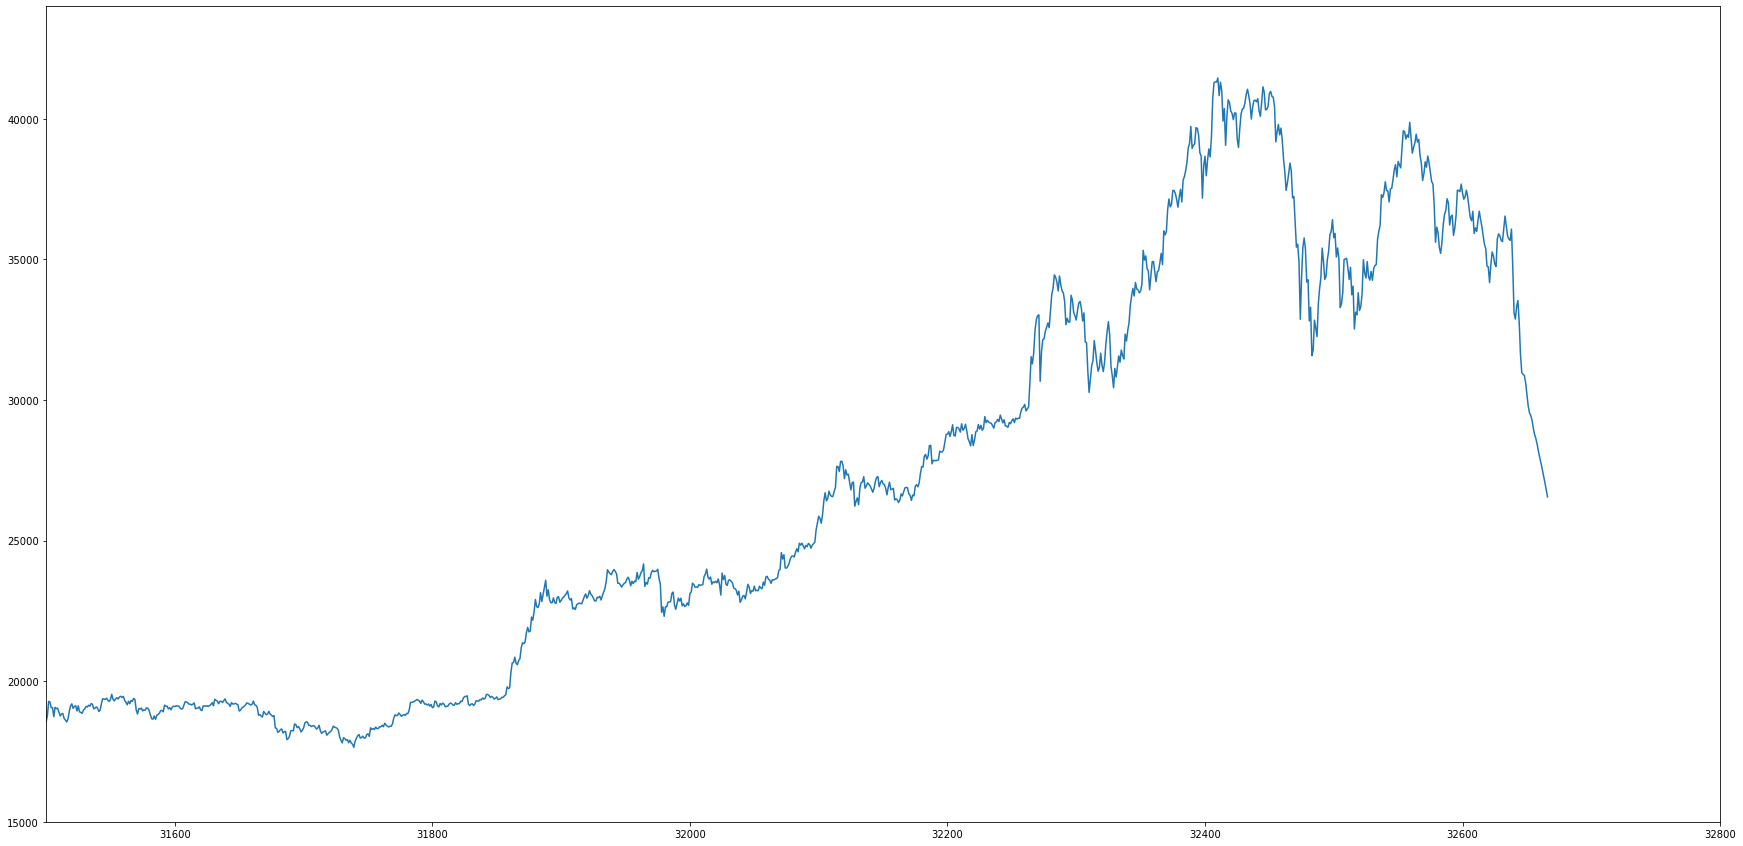

In [144]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(df3)
plt.show()

### PART 2 - multy-layer only

In [42]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [43]:
df1=df.reset_index()['close']

In [44]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
print(df1)

[[0.03996353]
 [0.04027027]
 [0.03719567]
 ...
 [0.8631646 ]
 [0.8540158 ]
 [0.85141791]]


In [46]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
training_size,test_size

(26109, 6528)

In [48]:
#train_data

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(26008, 100)
(26008,)


(None, None)

In [52]:
print(X_test.shape), print(ytest.shape)

(6427, 100)
(6427,)


(None, None)

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
#creating LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)               

In [57]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [58]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/20
407/407 [==============================] - 134s 298ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 2/20
407/407 [==============================] - 119s 293ms/step - loss: 8.9010e-05 - val_loss: 0.0023
Epoch 3/20
407/407 [==============================] - 119s 292ms/step - loss: 6.6860e-05 - val_loss: 9.1213e-04
Epoch 4/20
407/407 [==============================] - 119s 292ms/step - loss: 5.8270e-05 - val_loss: 0.0025
Epoch 5/20
407/407 [==============================] - 131s 323ms/step - loss: 5.2690e-05 - val_loss: 0.0015
Epoch 6/20
407/407 [==============================] - 116s 286ms/step - loss: 4.8847e-05 - val_loss: 9.8447e-04
Epoch 7/20
407/407 [==============================] - 121s 298ms/step - loss: 5.1102e-05 - val_loss: 0.0024
Epoch 8/20
407/407 [==============================] - 122s 300ms/step - loss: 4.7738e-05 - val_loss: 8.9330e-04
Epoch 9/20
407/407 [==============================] - 123s 301ms/step - loss: 4.0486e-05 - val_loss: 0.0013
Epoch 10/20
407/407 

In [59]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

8168.085999432156

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15360.364763808999

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

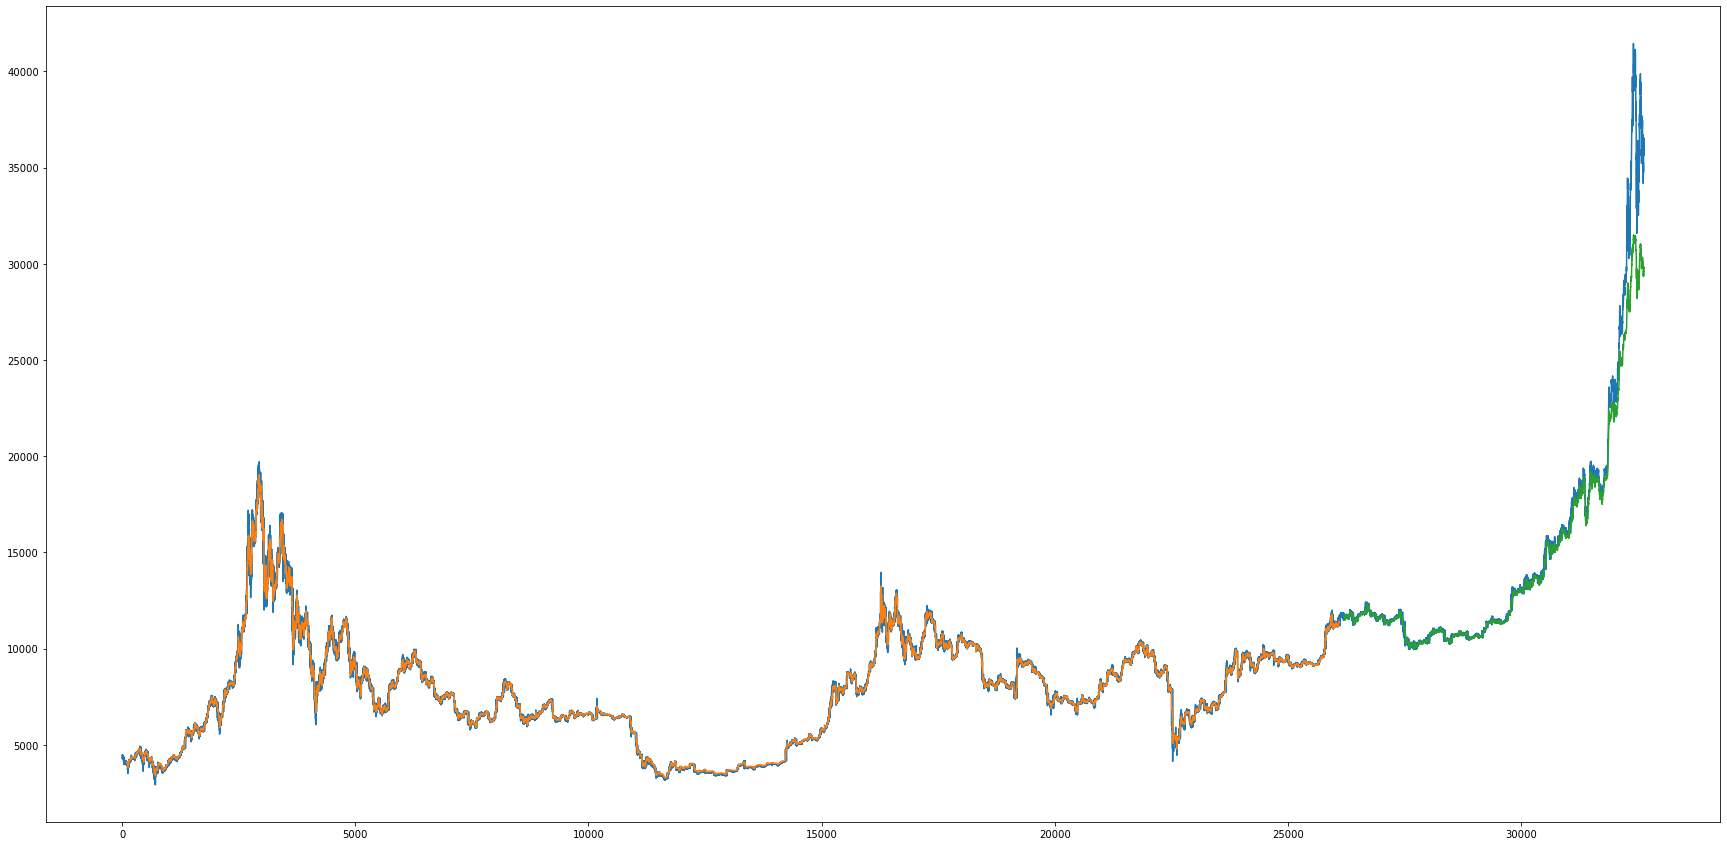

In [64]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

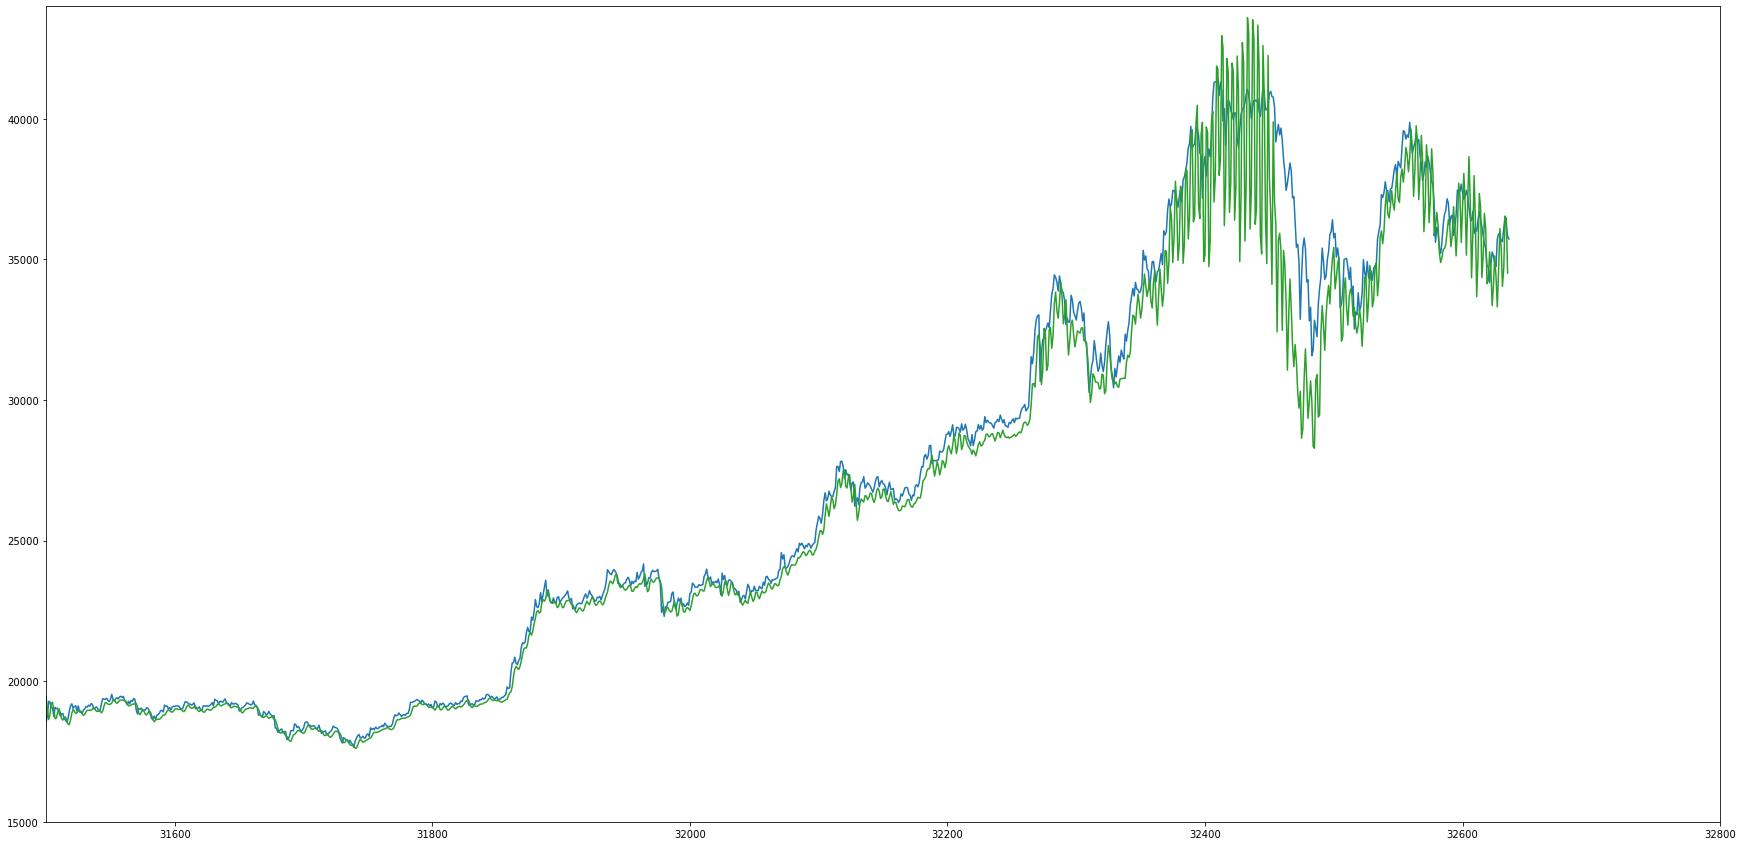

In [146]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [66]:
len(test_data)

6528

In [67]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [68]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [69]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.6959437727928162], [0.6625284552574158], [0.6403380632400513], [0.6384074687957764], [0.627729594707489], [0.6088306903839111], [0.5945913791656494], [0.5854352116584778], [0.5764620304107666], [0.5663037896156311], [0.5560354590415955], [0.5464324355125427], [0.5374107360839844], [0.5286266803741455], [0.5199579000473022], [0.5114923119544983], [0.5033305883407593], [0.49549323320388794], [0.4879540801048279], [0.48068803548812866], [0.47368597984313965], [0.4669461250305176], [0.4604640603065491], [0.4542301893234253], [0.4482318162918091], [0.4424574375152588], [0.4368971586227417], [0.4315418004989624], [0.4263837933540344], [0.4214153289794922]]


In [70]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [71]:
len(df1)

32637

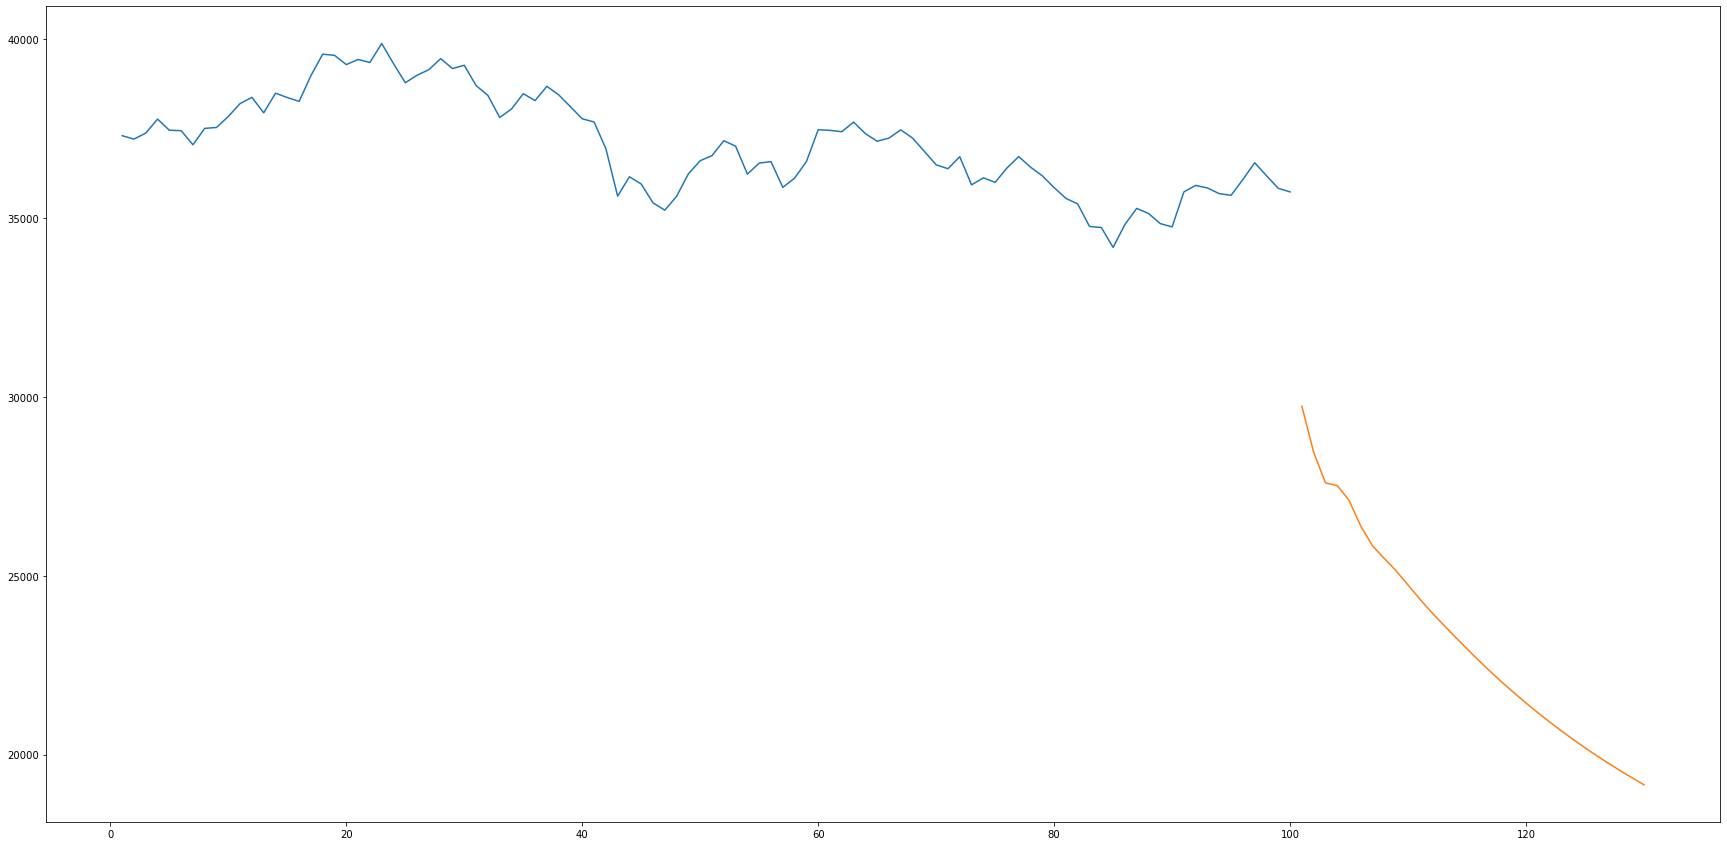

In [72]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

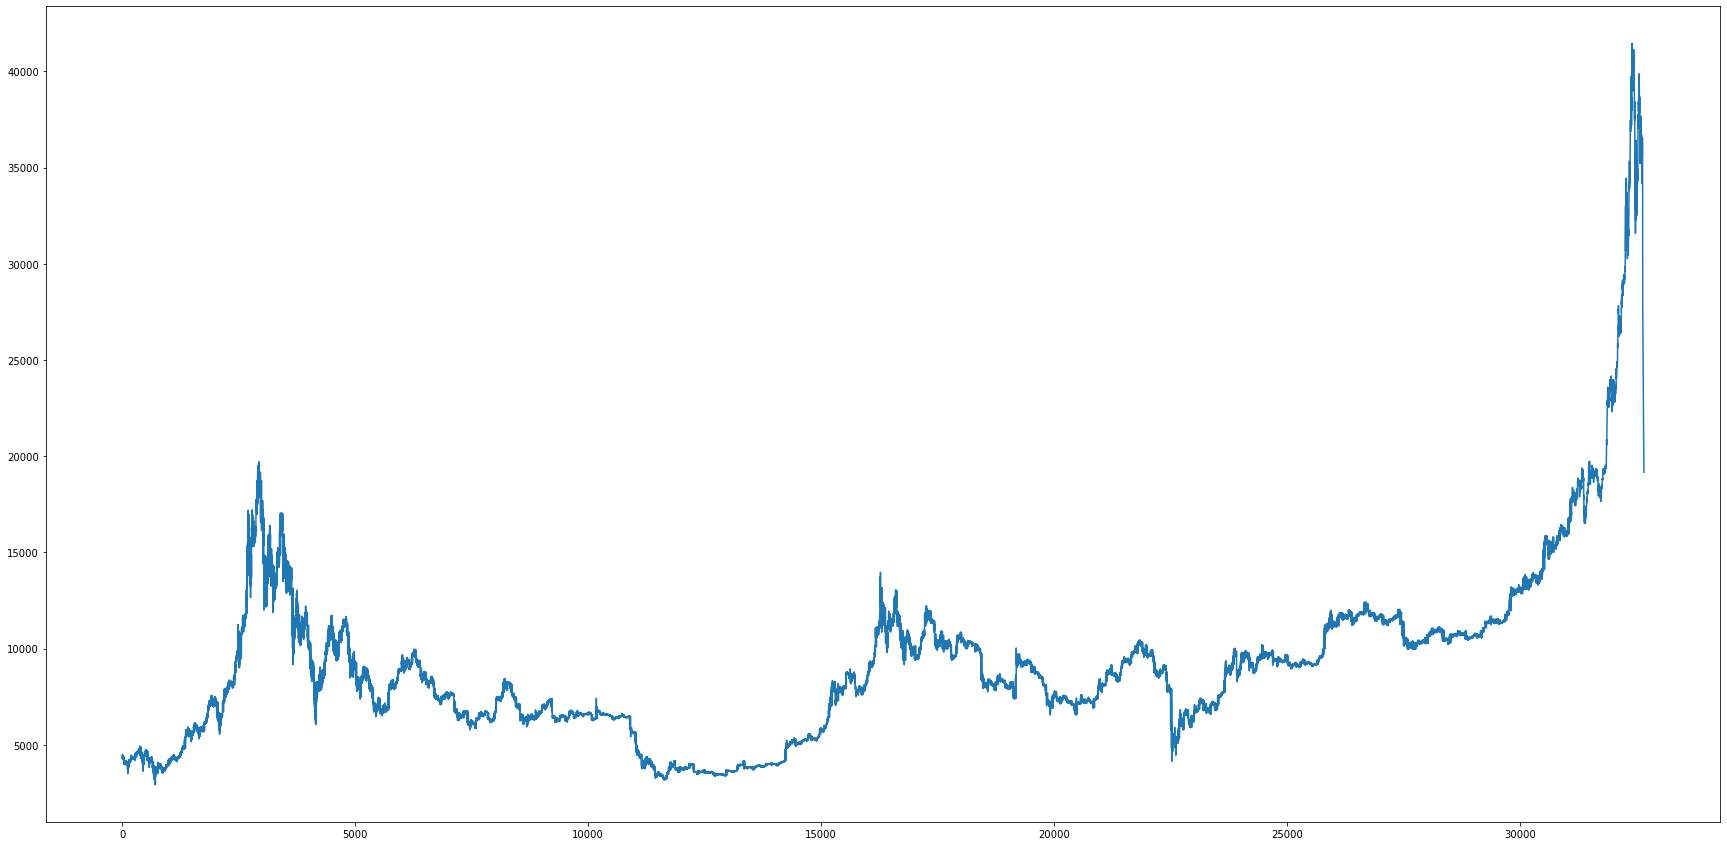

In [73]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

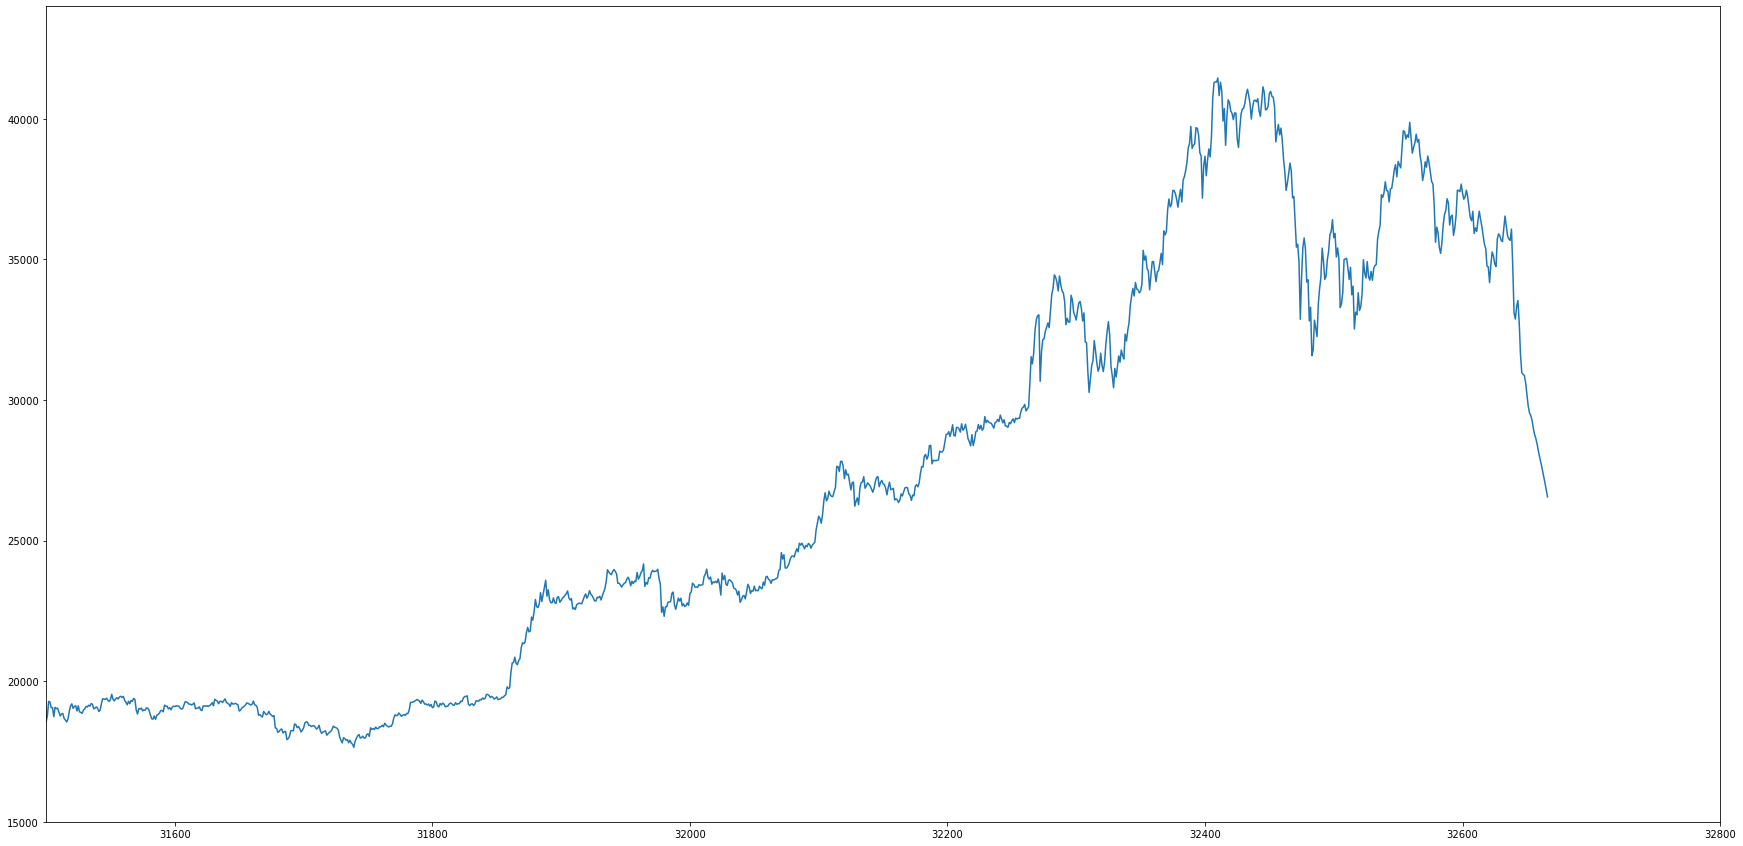

In [147]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(df3)
plt.show()

### PART 3 - Bidirectional

In [75]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [76]:
df1=df.reset_index()['close']

In [77]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [78]:
print(df1)

[[0.03996353]
 [0.04027027]
 [0.03719567]
 ...
 [0.8631646 ]
 [0.8540158 ]
 [0.85141791]]


In [79]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [80]:
training_size,test_size

(26109, 6528)

In [81]:
#train_data

In [82]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [83]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
print(X_train.shape), print(y_train.shape)

(26008, 100)
(26008,)


(None, None)

In [85]:
print(X_test.shape), print(ytest.shape)

(6427, 100)
(6427,)


(None, None)

In [86]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [87]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [88]:
#creating LSTM

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(100, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [90]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [91]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/20
407/407 [==============================] - 23s 51ms/step - loss: 0.0013 - val_loss: 1803407327232.0000
Epoch 2/20
407/407 [==============================] - 21s 51ms/step - loss: 3.8068e-05 - val_loss: 0.0671
Epoch 3/20
407/407 [==============================] - 21s 51ms/step - loss: 3.3418e-05 - val_loss: 0.0025
Epoch 4/20
407/407 [==============================] - 20s 50ms/step - loss: 3.1134e-05 - val_loss: 8.9338e-04
Epoch 5/20
407/407 [==============================] - 20s 50ms/step - loss: 2.8916e-05 - val_loss: 2.5229e-04
Epoch 6/20
407/407 [==============================] - 20s 50ms/step - loss: 2.9329e-05 - val_loss: 1.4683e-04
Epoch 7/20
407/407 [==============================] - 20s 50ms/step - loss: 3.2264e-05 - val_loss: 1.5980e-04
Epoch 8/20
407/407 [==============================] - 21s 52ms/step - loss: 2.8063e-05 - val_loss: 1.0583e-04
Epoch 9/20
407/407 [==============================] - 21s 51ms/step - loss: 3.1099e-05 - val_loss: 6.8170e-05
Epoch 10/20
40

In [92]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [93]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [94]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

8268.567866820737

In [95]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

16425.19020963001

In [96]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

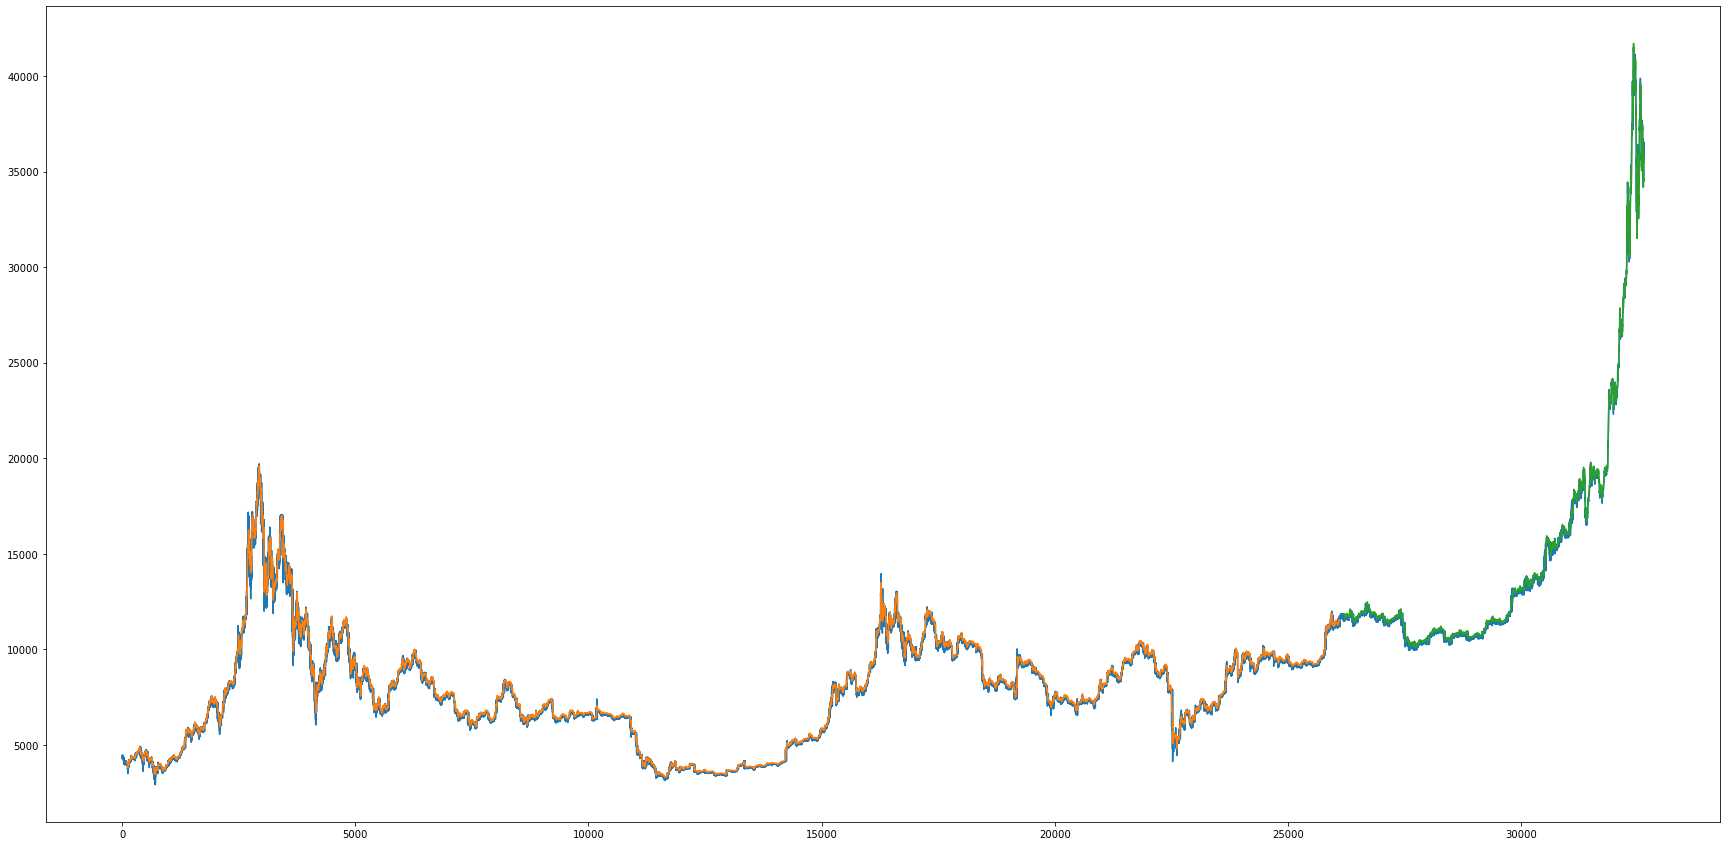

In [97]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

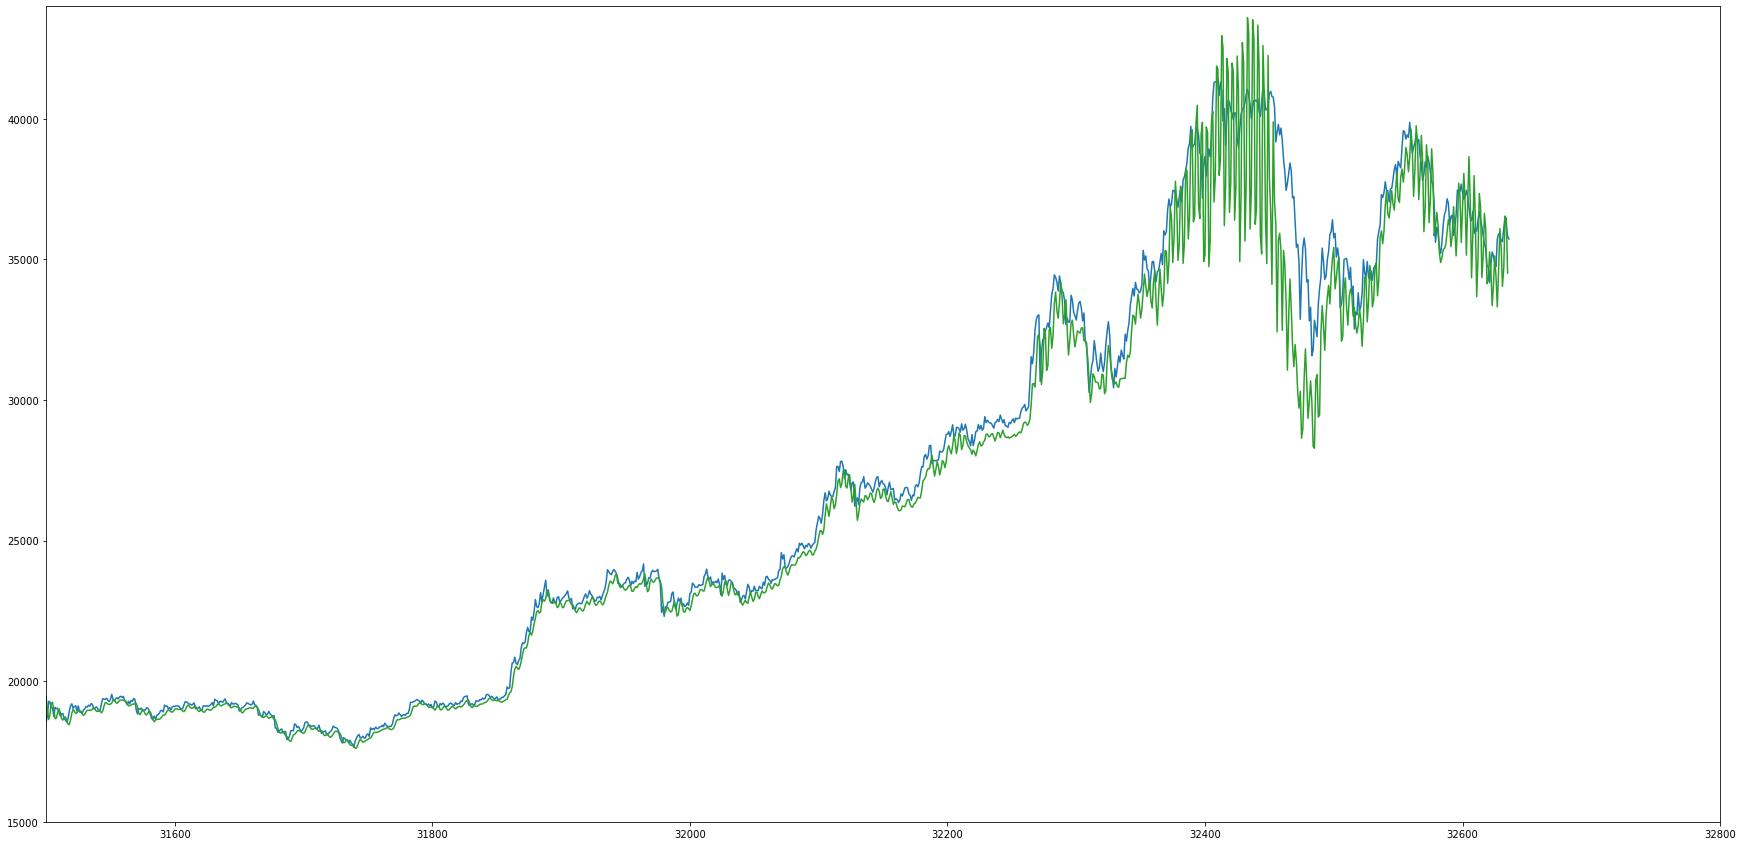

In [148]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [99]:
len(test_data)

6528

In [100]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [101]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [102]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8557794094085693], [0.8509759902954102], [0.8508623838424683], [0.84711754322052], [0.8457973599433899], [0.8425043225288391], [0.8404771685600281], [0.8373422622680664], [0.8348740339279175], [0.8317904472351074], [0.8290168046951294], [0.8259220719337463], [0.8230094909667969], [0.8198421597480774], [0.8168134689331055], [0.8136530518531799], [0.8105281591415405], [0.807327926158905], [0.8042027354240417], [0.801051139831543], [0.7979004979133606], [0.7947745323181152], [0.7916046977043152], [0.7885528802871704], [0.7854793667793274], [0.782416045665741], [0.7793868184089661], [0.7763708233833313], [0.7734317779541016], [0.7704721689224243]]


In [103]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [104]:
len(df1)

32637

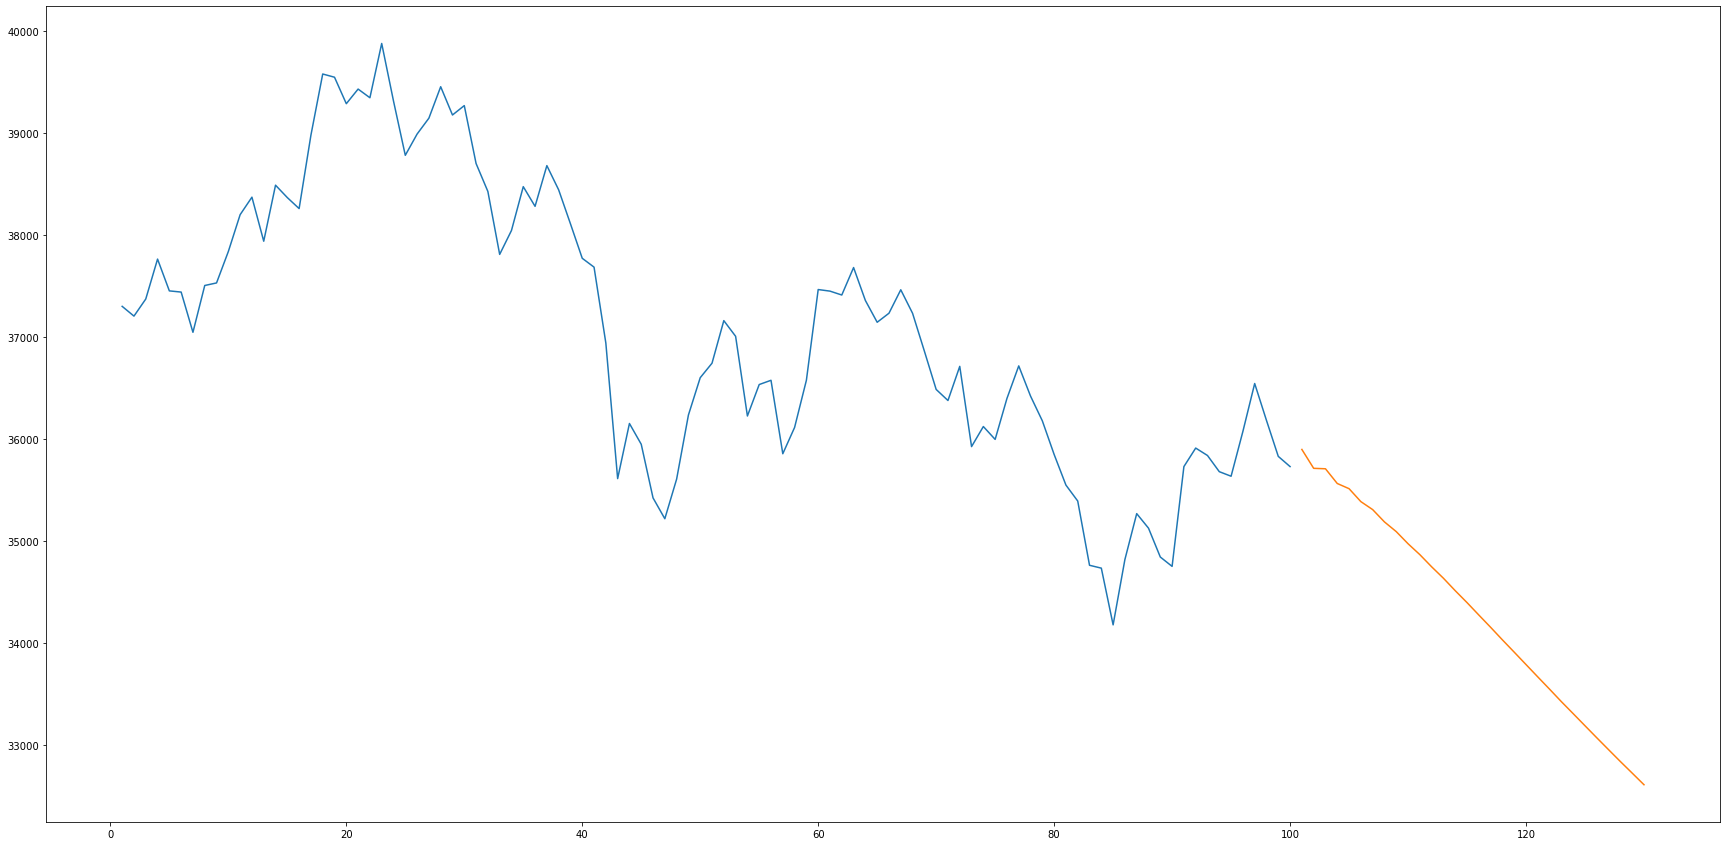

In [105]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

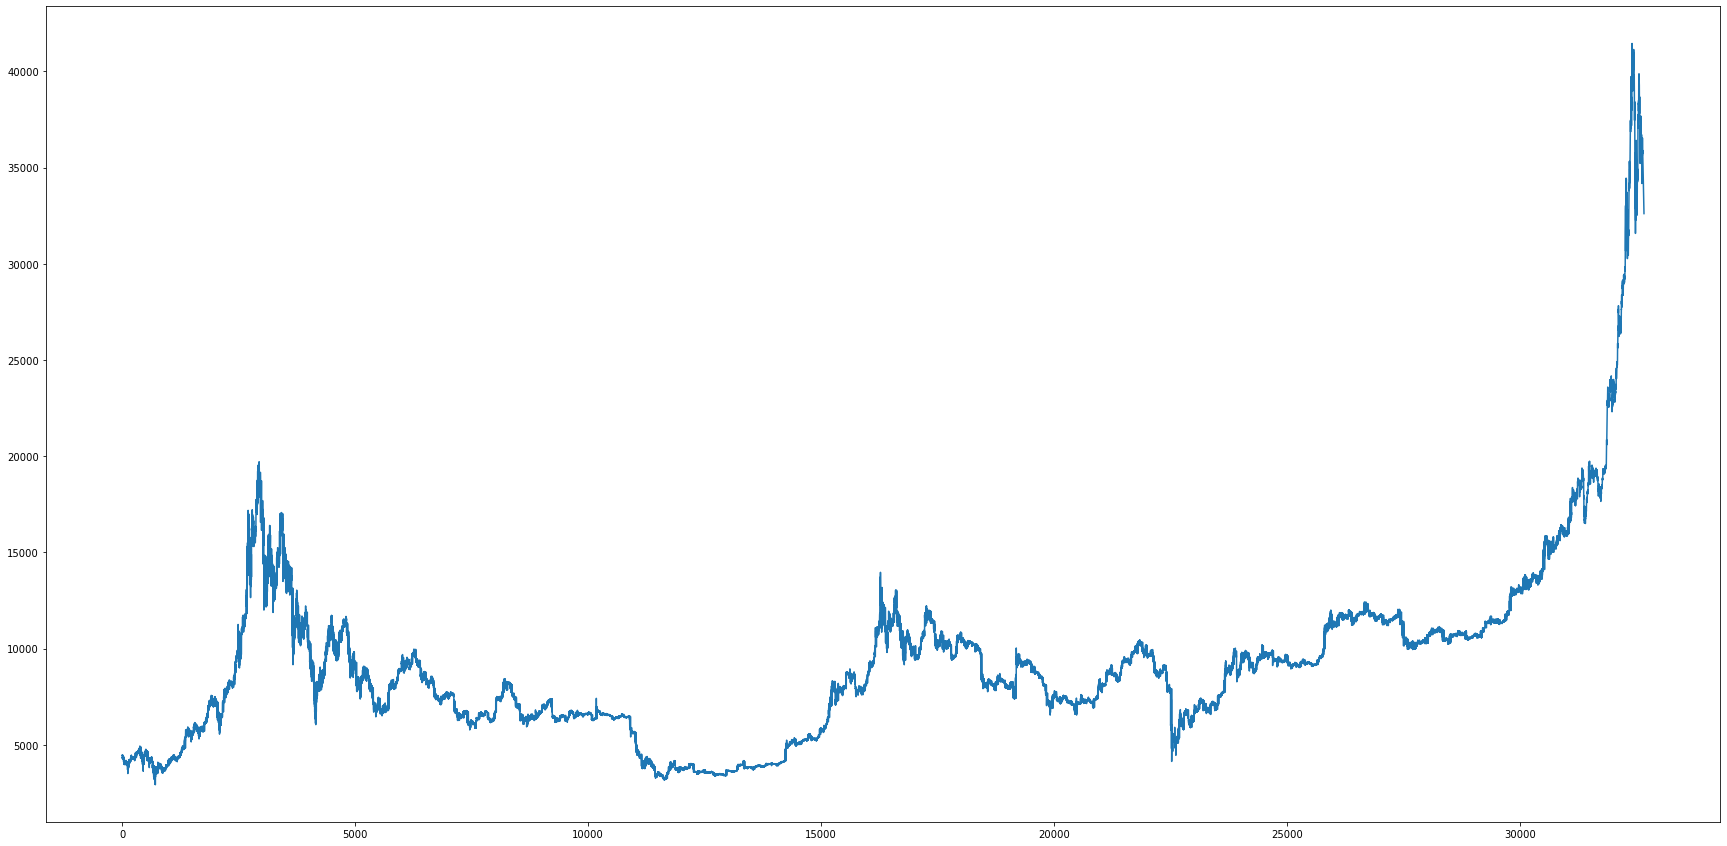

In [106]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

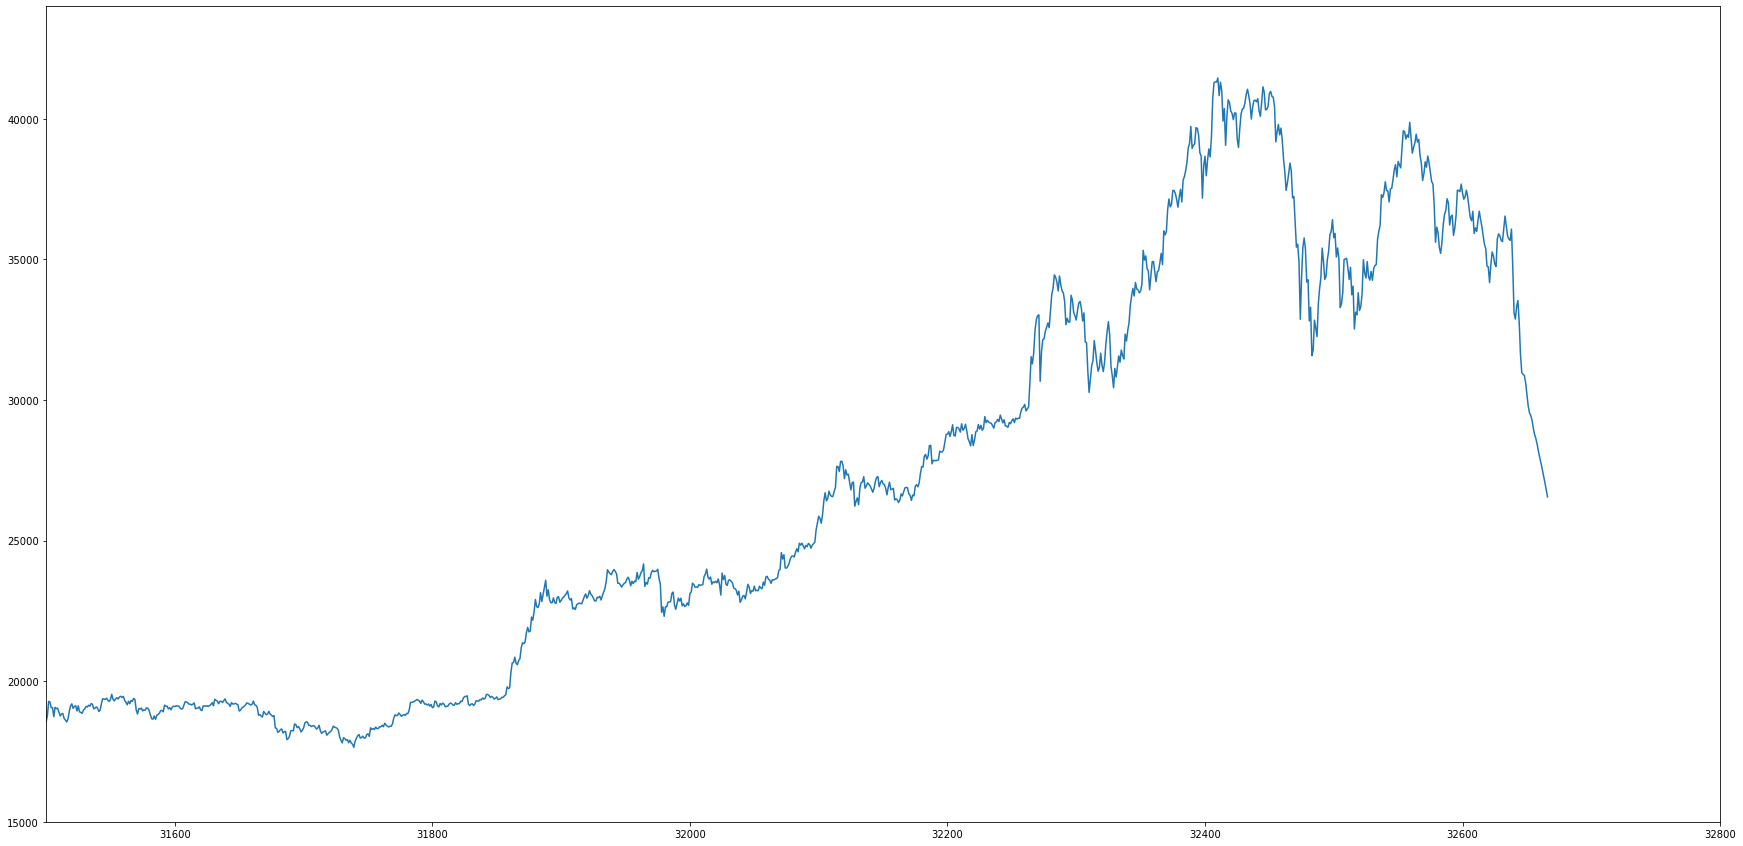

In [149]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(df3)
plt.show()

### PART 4 - Multilayer + Relu

In [108]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [109]:
df1=df.reset_index()['close']

In [110]:
# minmax tool. Minmax 0 to -1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [111]:
print(df1)

[[0.03996353]
 [0.04027027]
 [0.03719567]
 ...
 [0.8631646 ]
 [0.8540158 ]
 [0.85141791]]


In [112]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [113]:
training_size,test_size

(26109, 6528)

In [114]:
#train_data

In [115]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [116]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [117]:
print(X_train.shape), print(y_train.shape)

(26008, 100)
(26008,)


(None, None)

In [118]:
print(X_test.shape), print(ytest.shape)

(6427, 100)
(6427,)


(None, None)

In [119]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [120]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [121]:
#creating LSTM

model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100, 200)          161600    
_________________________________________________________________
lstm_12 (LSTM)               (None, 100, 100)          120400    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [122]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100, 200)          161600    
_________________________________________________________________
lstm_12 (LSTM)               (None, 100, 100)          120400    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [123]:
#fit model into test set and based on parameters (epochs, batch_size and verbose). Those parameters can be optimized

In [124]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epc,batch_size=64,verbose=1)

# epochs = interaction
# in most cases, an optimal batch-size is 64
# Verbose=0 (silent) Verbose=1 (progress bar)

Epoch 1/20
407/407 [==============================] - 140s 333ms/step - loss: 0.0023 - val_loss: 0.3401
Epoch 2/20
407/407 [==============================] - 135s 331ms/step - loss: 6.2009e-05 - val_loss: 0.1231
Epoch 3/20
407/407 [==============================] - 135s 331ms/step - loss: 5.5864e-05 - val_loss: 2.9518e-04
Epoch 4/20
407/407 [==============================] - 135s 332ms/step - loss: 4.4747e-05 - val_loss: 0.0015
Epoch 5/20
407/407 [==============================] - 134s 329ms/step - loss: 4.6005e-05 - val_loss: 2.9661e-04
Epoch 6/20
407/407 [==============================] - 134s 330ms/step - loss: 4.2945e-05 - val_loss: 2.8533e-04
Epoch 7/20
407/407 [==============================] - 136s 334ms/step - loss: 4.1003e-05 - val_loss: 0.0012
Epoch 8/20
407/407 [==============================] - 138s 339ms/step - loss: 3.9992e-05 - val_loss: 6.1594e-05
Epoch 9/20
407/407 [==============================] - 133s 327ms/step - loss: 3.5595e-05 - val_loss: 2.4697e-04
Epoch 10/20


In [125]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [126]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [127]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

8109.380239944049

In [128]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

16109.106824842735

In [129]:
### Plotting 
# shift train predictions for plotting
look_back=100 #must change in accordance to step_back
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

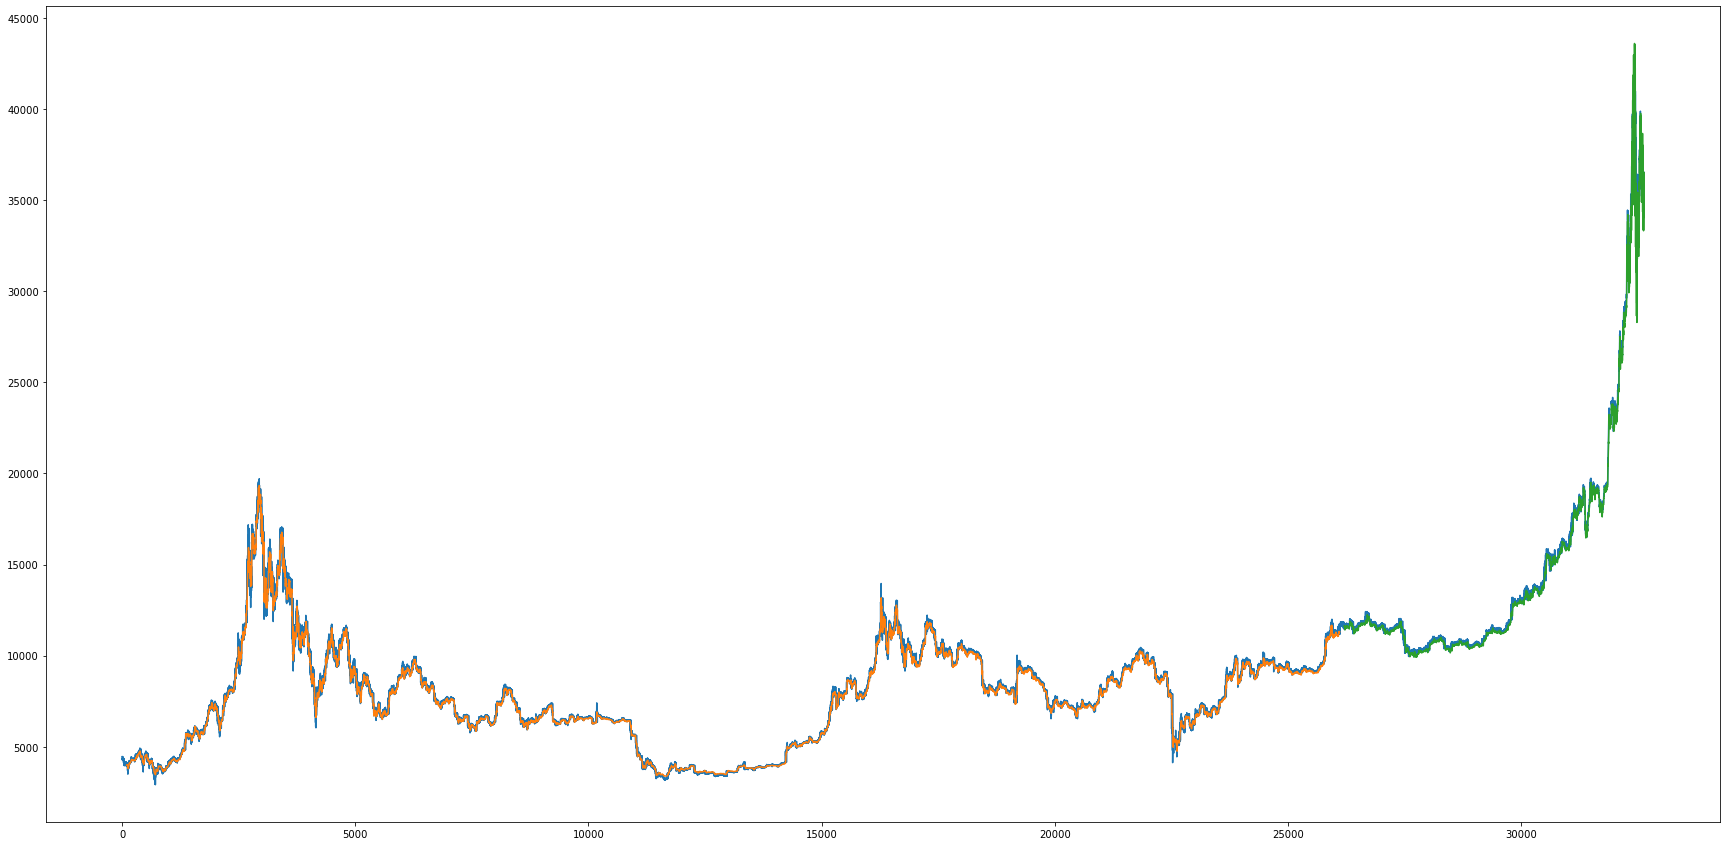

In [130]:
# plot baseline and predictions https://stackabuse.com/change-figure-size-in-matplotlib/
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

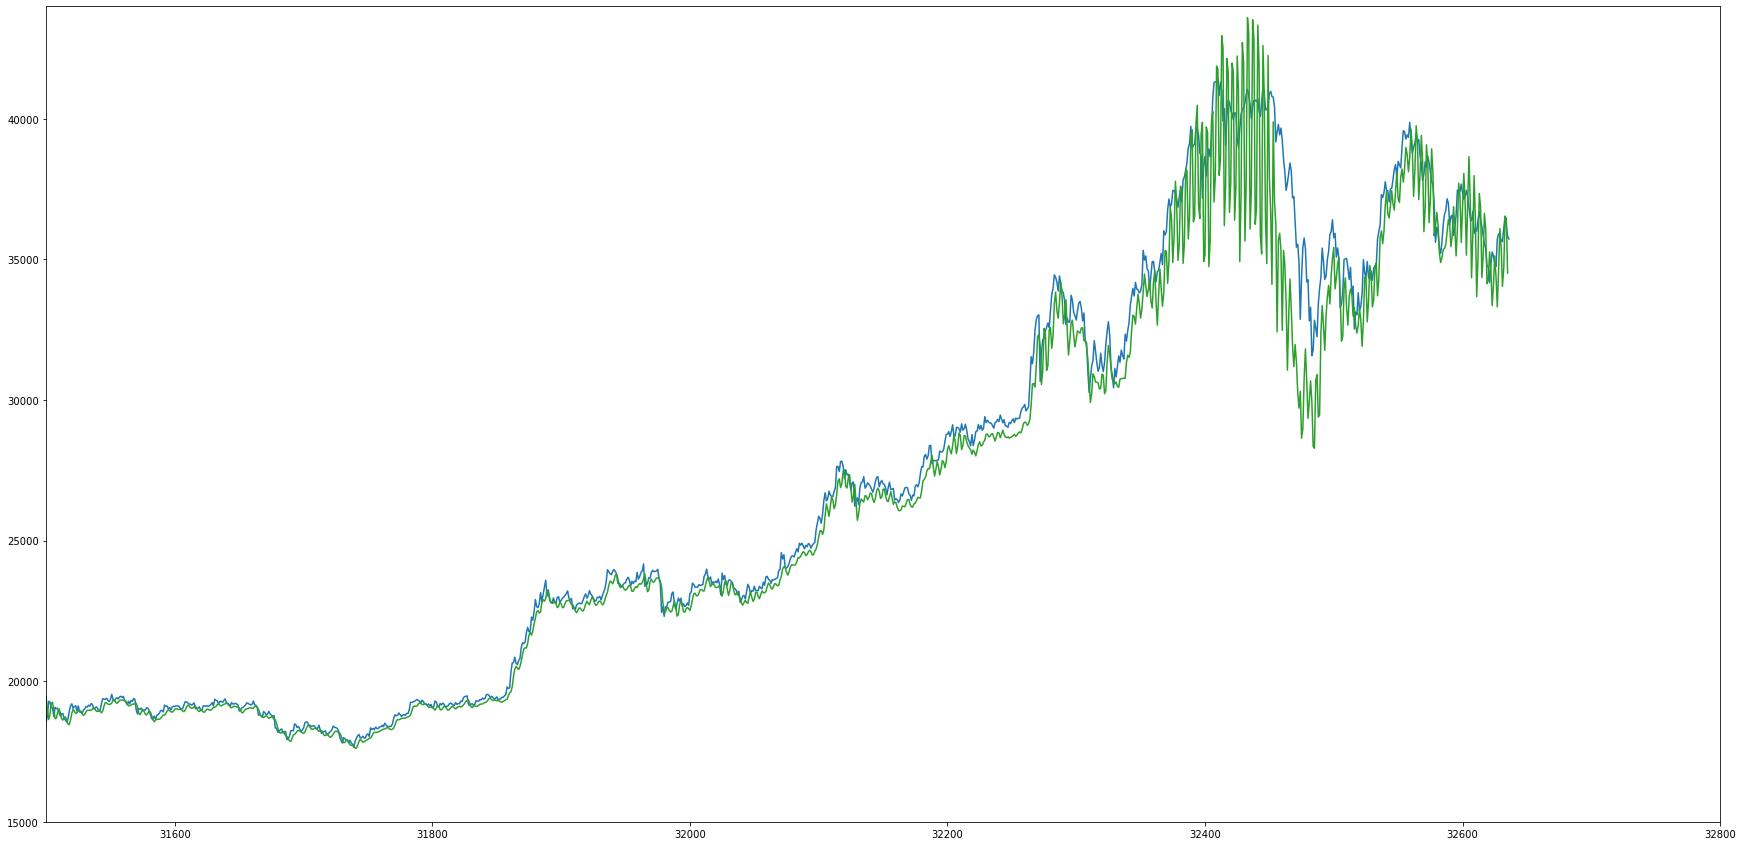

In [150]:
#Zoom in
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([31500,32800,15000,44000])
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [132]:
len(test_data)

6528

In [133]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape
#need to substract look_back days, hours

(1, 100)

In [134]:
#putting them on a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [135]:
# demonstrate prediction for next X days, hours = time o/i
lst_output=[]
n_steps=100
i=0
while(i<30): # X days, hours, etc
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8501005172729492], [0.8605161309242249], [0.8260044455528259], [0.7831401824951172], [0.7774509191513062], [0.7889811992645264], [0.7945542335510254], [0.7747113108634949], [0.7450928688049316], [0.7280411720275879], [0.7264814376831055], [0.7254548072814941], [0.7187483906745911], [0.7075693011283875], [0.6972269415855408], [0.6910908818244934], [0.6884658336639404], [0.6838836669921875], [0.6764641404151917], [0.67084801197052], [0.6669160723686218], [0.6615598201751709], [0.6550741195678711], [0.6493672728538513], [0.6441761255264282], [0.6385175585746765], [0.6322143077850342], [0.6265068054199219], [0.6201726198196411], [0.6133704781532288]]


In [136]:
#predict for the next X days
#manual data
#day_new=np.arange(1,1+n_step)
#day_pred=np.arange(1+n_step,1+n_step+days)

time_new=np.arange(1,101)
time_pred=np.arange(101,131)

In [137]:
len(df1)

32637

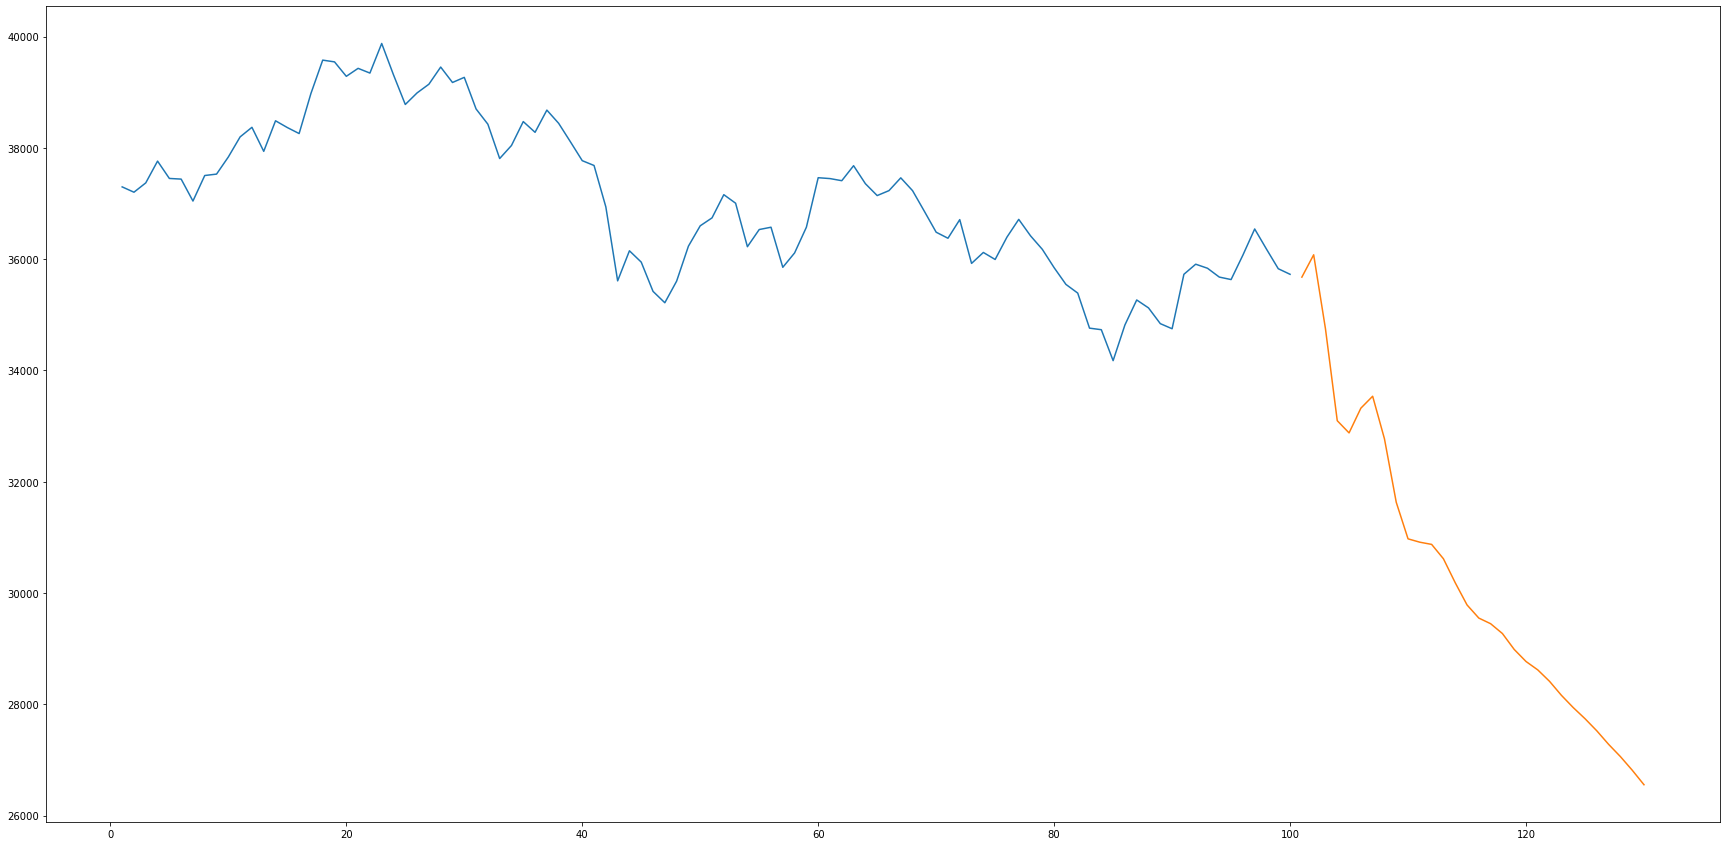

In [138]:
plt.figure(figsize=(30, 15))
plt.plot(time_new,scaler.inverse_transform(df1[(len(df1)-n_steps):]))
plt.plot(time_pred,scaler.inverse_transform(lst_output))
plt.show()

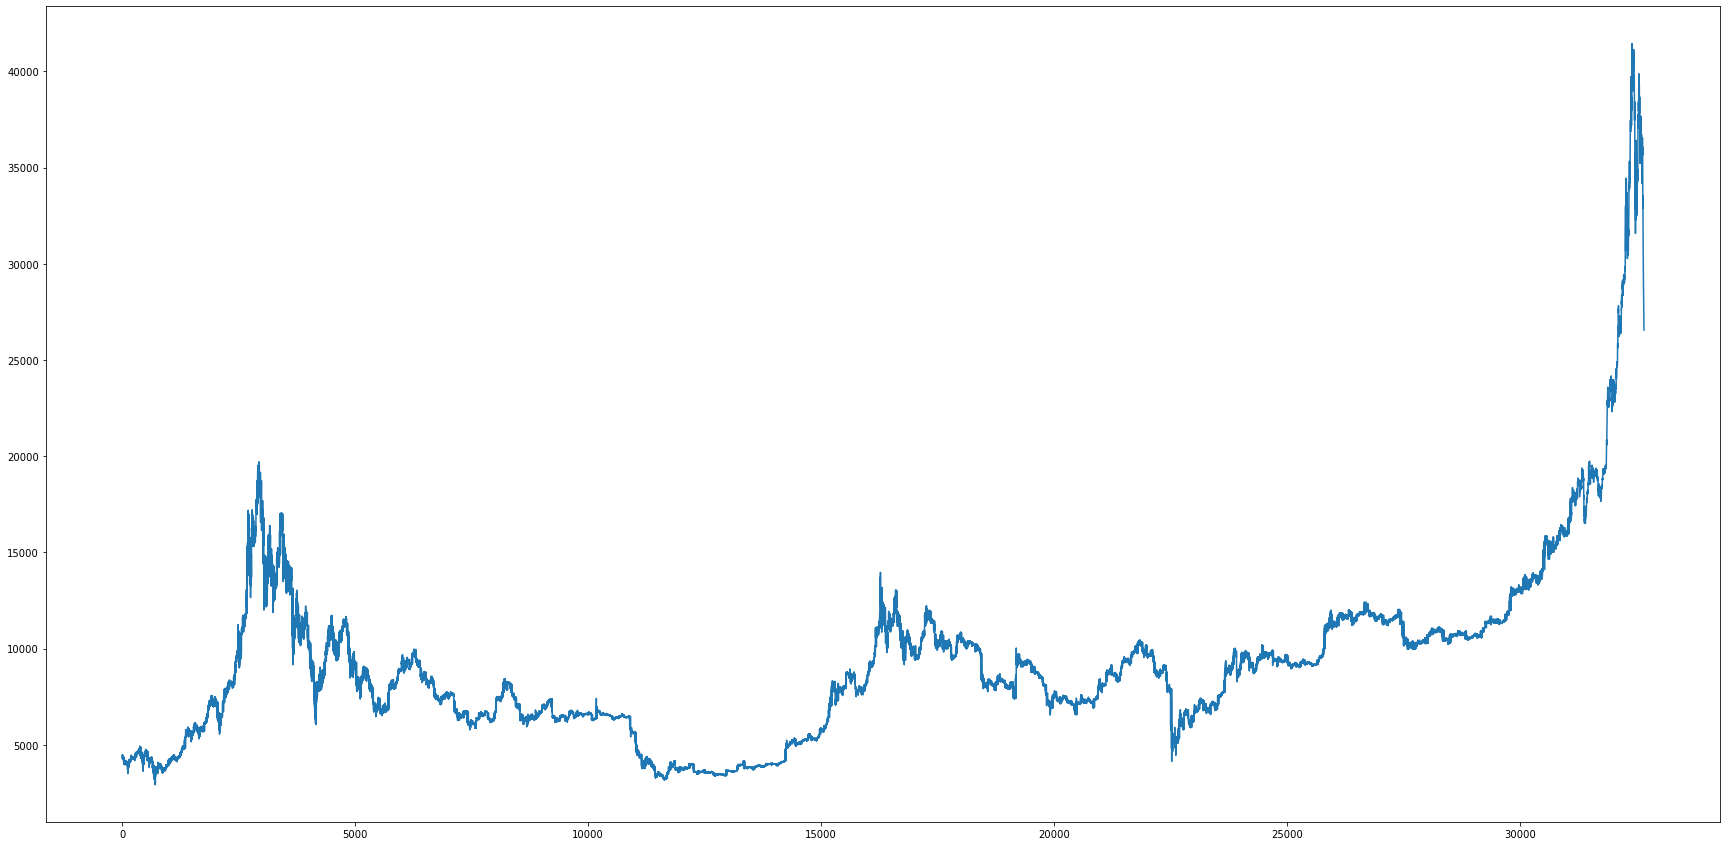

In [139]:
#extend prediction on the graph

df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

plt.figure(figsize=(30, 15))
plt.plot(df3)
plt.show()

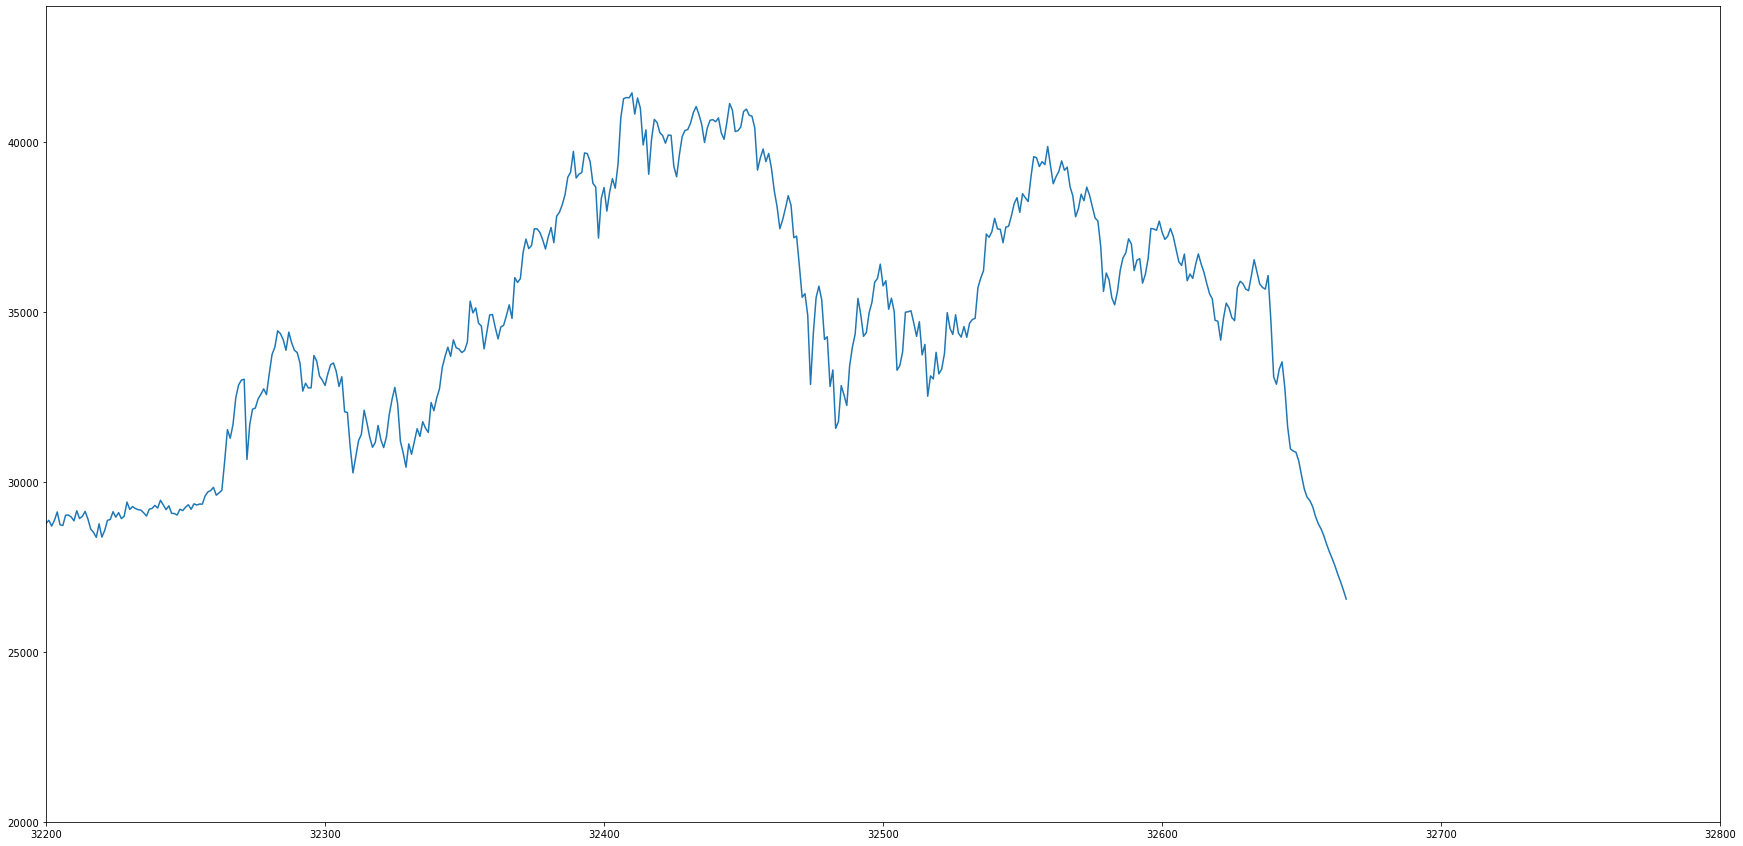

In [152]:
plt.figure(figsize=(30, 15))
#adjust zoom in to the stock/security axis
plt.axis([32200,32800,20000,44000])
plt.plot(df3)
plt.show()